In [1]:
# import all libs

import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np


torch.__version__

'2.6.0'

In [2]:
# device agonistic code
device = "gpu" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
# create data
w = 0.9
b = 0.4

start = 0
end = 1
step =0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = w*X + b
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4180],
         [0.4360],
         [0.4540],
         [0.4720],
         [0.4900],
         [0.5080],
         [0.5260],
         [0.5440],
         [0.5620]]))

In [4]:
# split the data
train_split_size = int(0.8 * len(X))

X_train, y_train = X[:train_split_size], y[:train_split_size]
X_test, y_test = X[train_split_size:], y[train_split_size:]
len(X_train), len(X_test)

(40, 10)

In [5]:
# plot the data

def plot_predition(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,predition=None):
    
    plt.scatter(X_train,y_train, c="b", label="Training data")
    plt.scatter(X_test, y_test, c="g", label="Testing data")
    
    if predition is not None : 
        plt.scatter(X_test, predition, c="r", label="Predition")
    
    plt.legend()

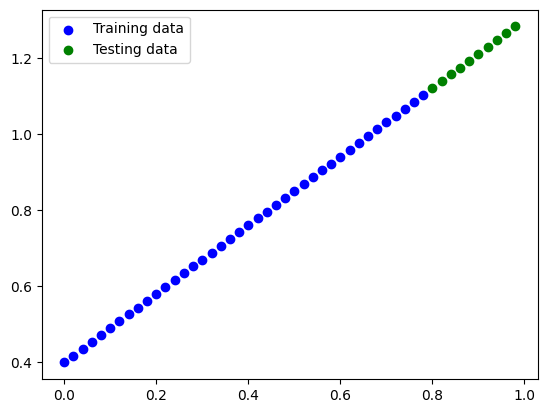

In [6]:
plot_predition()

In [7]:
from torch import nn
class LinearLayers(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layers = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x:torch.Tensor)-> torch.Tensor:
        return self.linear_layers(x)

In [8]:
torch.manual_seed(42)
model_1 = LinearLayers()

model_1.state_dict()

OrderedDict([('linear_layers.weight', tensor([[0.7645]])),
             ('linear_layers.bias', tensor([0.8300]))])

In [9]:
# Loss function
loss_fn = nn.L1Loss() # MAE
# optimizer
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)


In [10]:
# training loop
epochs = 180

train_loss_count = []
test_loss_count = []
epoch_count = []

for epoch in range(epochs):
    # traing mode activated
    model_1.train()
    
    # do the foward pass
    pred = model_1(X_train)
    
    # calc the loss
    train_loss = loss_fn(pred, y_train)
    
    # set the zero grad
    optimizer.zero_grad()
    
    # backpropagation
    train_loss.backward()
    
    # adjust the weights
    
    optimizer.step()
    
    #eval
    model_1.eval()
    
    with torch.inference_mode():
        preds = model_1(X_test)
        test_loss = loss_fn(preds, y_test)
        train_loss_count.append(train_loss)
        test_loss_count.append(test_loss)
        epoch_count.append(epoch)
        
        if epoch % 10 == 0 :
            print(f"The train loss: {train_loss} | test loss : {test_loss} | epoch : {epoch}")
        
        
        
    
    
    

The train loss: 0.3771779239177704 | test loss : 0.2959762513637543 | epoch : 0
The train loss: 0.26196807622909546 | test loss : 0.16126640141010284 | epoch : 10
The train loss: 0.14675821363925934 | test loss : 0.026556575670838356 | epoch : 20
The train loss: 0.060565829277038574 | test loss : 0.07872583717107773 | epoch : 30
The train loss: 0.04930984228849411 | test loss : 0.10161155462265015 | epoch : 40
The train loss: 0.04526454955339432 | test loss : 0.10164407640695572 | epoch : 50
The train loss: 0.04174921661615372 | test loss : 0.09680596739053726 | epoch : 60
The train loss: 0.03831040859222412 | test loss : 0.088533416390419 | epoch : 70
The train loss: 0.03487955778837204 | test loss : 0.08094775676727295 | epoch : 80
The train loss: 0.03144560009241104 | test loss : 0.07267521321773529 | epoch : 90
The train loss: 0.028006792068481445 | test loss : 0.06440267711877823 | epoch : 100
The train loss: 0.02457762323319912 | test loss : 0.05681701749563217 | epoch : 110
The 

/var/folders/c7/z9xcy1l1481bm3hgrydzvlxm0000gn/T/ipykernel_10766/3235289961.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


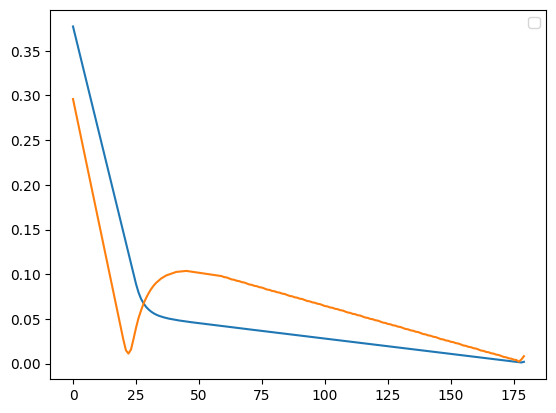

In [11]:
plt.plot(epoch_count,torch.tensor(train_loss_count).numpy())
plt.plot(epoch_count,torch.tensor(test_loss_count).numpy())

plt.legend()

In [12]:
model_1.state_dict()

OrderedDict([('linear_layers.weight', tensor([[0.8987]])),
             ('linear_layers.bias', tensor([0.4095]))])

In [13]:
model_1.eval()

with torch.inference_mode():
    predus = model_1(X_test)

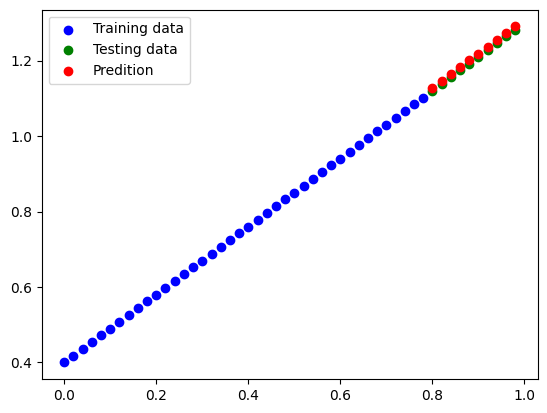

In [14]:
plot_predition(predition=predus)            

In [17]:
# saving and loading model

torch.save(model_1, "./models/tree.pt")

In [28]:
loaded_model_weights = torch.load("./models/two.pt")

In [29]:
loaded_model = LinearLayers()

loaded_model.state_dict()

OrderedDict([('linear_layers.weight', tensor([[-0.2191]])),
             ('linear_layers.bias', tensor([0.2018]))])

In [31]:
loaded_model.load_state_dict(loaded_model_weights)

<All keys matched successfully>

In [32]:
loaded_model.state_dict()

OrderedDict([('linear_layers.weight', tensor([[0.8987]])),
             ('linear_layers.bias', tensor([0.4095]))])

In [37]:
# to create a model directory
from pathlib import Path

MODEL_PATH = Path("new_model")

MODEL_PATH.mkdir(parents=True, exist_ok=True)
